In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# open train set csv as dataframe
train = pd.read_csv('21_months.train.csv')
print(train.shape)
train.head()
# non-target channels: 1-11, 53-56, 67-69, out of 76 total channels (the others are target channels)
# telecommands are binary (0 or 1)

(1840321, 175)


,timestamp,channel_1,channel_10,channel_11,channel_12,channel_13,channel_14,channel_15,channel_16,channel_17,...,is_anomaly_telecommand_350,is_anomaly_telecommand_351,is_anomaly_telecommand_352,is_anomaly_telecommand_353,is_anomaly_telecommand_354,is_anomaly_telecommand_36,is_anomaly_telecommand_376,is_anomaly_telecommand_38,is_anomaly_telecommand_39,is_anomaly_telecommand_40
0,2000-01-01 00:00:00,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0,0,0,0,0,0,0,0,0,0
1,2000-01-01 00:00:30,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0,0,0,0,0,0,0,0,0,0
2,2000-01-01 00:01:00,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0,0,0,0,0,0,0,0,0,0
3,2000-01-01 00:01:30,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0,0,0,0,0,0,0,0,0,0
4,2000-01-01 00:02:00,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# count number channel containing at least 1 anomaly using the binary columns "is_anomaly_channel{n}"
anomalies = train.filter(like='is_anomaly_channel')
mask = anomalies.sum() != 0
len(anomalies.columns[mask])

53

In [5]:
mask_nominal = anomalies.sum() == 0
len(anomalies.columns[mask_nominal])

23

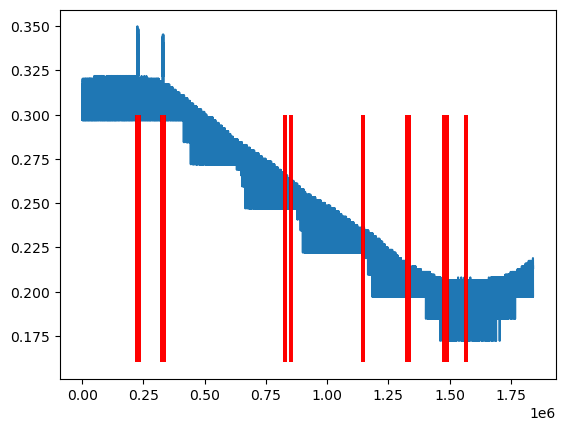

In [6]:
plt.plot(train['channel_12'])
# plot a vertical line where columns "is_anomaly_channel_12" is greater than 0
plt.vlines(train.index[train['is_anomaly_channel_12'] != 0], ymin=0.16, ymax=0.3, color='red')

In [ ]:
train['is_anomaly_channel_12'].unique() # nominal, anomaly, rare_event, communication_gap

array([0, 1, 2, 3], dtype=int64)

In [11]:
#extract consecutive points from "train" such that there are no anomalies in any of the channels, therefore splitting the data into several 2 subseries (before the anomaly occurs and after up to the next anomaly) for each anomaly
def extract_clean_consecutive_timepoints(train_data):
    # find the indices of the anomalies
    anomaly_indices = train_data.index[train_data.filter(like='is_anomaly_channel').sum(axis=1) != 0]
    # create a list to store the subseries
    subseries = []
    # initialize the start index of the subseries
    start_idx = -1
    # iterate over the anomaly indices
    for idx in anomaly_indices:
        # extract the subseries from the start index to the anomaly index
        if idx - start_idx == 1:
            start_idx = idx
            continue
        
        subseries.append(train_data.iloc[start_idx + 1:idx])
        # update the start index to the next index
        start_idx = idx
    # extract the last subseries from the last anomaly index to the end of the data
    subseries.append(train_data.iloc[start_idx+1:])
    return subseries


In [ ]:
series = extract_clean_consecutive_timepoints(train)
series

[                  timestamp  channel_1  channel_10  channel_11  channel_12  \
 0       2000-01-01 00:00:00    0.13791         0.0         0.0    0.317175   
 1       2000-01-01 00:00:30    0.13791         0.0         0.0    0.317175   
 2       2000-01-01 00:01:00    0.13791         0.0         0.0    0.317175   
 3       2000-01-01 00:01:30    0.13791         0.0         0.0    0.317175   
 4       2000-01-01 00:02:00    0.13791         0.0         0.0    0.317175   
 ...                     ...        ...         ...         ...         ...   
 115378  2000-02-10 01:29:00    0.13791         0.0         0.0    0.309375   
 115379  2000-02-10 01:29:30    0.13791         0.0         0.0    0.309375   
 115380  2000-02-10 01:30:00    0.13791         0.0         0.0    0.309375   
 115381  2000-02-10 01:30:30    0.13791         0.0         0.0    0.310935   
 115382  2000-02-10 01:31:00    0.13791         0.0         0.0    0.310935   
 
         channel_13  channel_14  channel_15  chann

In [22]:
for i in range(len(series)):
    if series[i].filter(like='is_anomaly_channel').sum().sum() != 0:
        print('ANOMALY FOUND')
print("END")
print(len(series))

END
57


In [42]:
train['telecommand_354'].value_counts()

0.0    1840306
1.0         15
Name: telecommand_354, dtype: int64